<a href="https://colab.research.google.com/github/IGVF/seqspec/blob/main/examples/seqspec-dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf seqspec
!git clone https://github.com/igvf/seqspec
!cd seqspec && pip install --quiet .

Cloning into 'seqspec'...
remote: Enumerating objects: 1179, done.
remote: Counting objects: 100% (417/417), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 1179 (delta 300), reused 290 (delta 227), pack-reused 762
Receiving objects: 100% (1179/1179), 5.32 MiB | 10.30 MiB/s, done.
Resolving deltas: 100% (751/751), done.
  Preparing metadata (setup.py) ... done


In [2]:
!seqspec

usage: seqspec
       [-h]
       <CMD>
       ...

seqspec
0.0.0:
Format
sequence sp
ecification
files

positional arguments:
  <CMD>
    check
    validate
    seqspec
    file
    convert
    convert
    FASTA files
    find
    find
    regions in
    a seqspec
    file
    format
    format
    seqspec
    file
    index
    index
    regions in
    a seqspec
    file
    print
    print
    seqspec
    file
    split
    split
    regions in
    a seqspec
    file

optional arguments:
  -h, --help
    show this
    help
    message and
    exit


In [3]:
!head seqspec/assays/10x-RNA-v2/spec.yaml

!Assay
name: 10x-RNA-v2
doi: https://doi.org/10.1038/ncomms14049
publication_date: null
description: The 10x Genomics Chromium Single Cell 3' Solution V2 chemistry
modalities:
- RNA
lib_struct: https://teichlab.github.io/scg_lib_structs/methods_html/10xChromium3.html
assay_spec:
- !Region


In [4]:
!seqspec print seqspec/assays/10x-RNA-v2/spec.yaml

# 10x-RNA-v2
- DOI: [https://doi.org/10.1038/ncomms14049](https://doi.org/10.1038/ncomms14049)
- Description: The 10x Genomics Chromium Single Cell 3' Solution V2 chemistry
- Modalities: RNA
    
## Final Library
###### RNA
<pre style="overflow-x: auto; text-align: left; background-color: #f6f8fa">AATGATACGGCGACCACCGAGATCTACACTCTTTCCCTACACGACGCTCTTCCGATCTNNNNNNNNNNNNNNNNNNNNNNNNNNNNXAGATCGGAAGAGCACACGTCTGAACTCCAGTCACNNNNNNNNATCTCGTATGCCGTCTTCTGCTTG</pre>
1. <details><summary>Illumina P5</summary>

   - region_type: illumina_p5
   - sequence_type: fixed
   - sequence: <pre style="overflow-x: auto; text-align: left; margin: 0; display: inline;">AATGATACGGCGACCACCGAGATCTACAC</pre>
   - min_len: 29
   - max_len: 29
   - onlist: None
   </details>
2. <details><summary>Truseq Read 1</summary>

   - region_type: truseq_read1
   - sequence_type: fixed
   - sequence: <pre style="overflow-x: auto; text-align: left; margin: 0; display: inline;">TCTTTCCCTACACGACGCTCTTCCGATCT</pre>
   - min_len: 10

In [5]:
!seqspec check seqspec/assays/10x-RNA-v2/spec.yaml

[error 1] {'name': '10x-RNA-v2', 'doi': 'https://doi.org/10.1038/ncomms14049', 'publication_date': None, 'description': "The 10x Genomics Chromium Single Cell 3' Solution V2 chemistry", 'modalities': ['RNA'], 'lib_struct': 'https://teichlab.github.io/scg_lib_structs/methods_html/10xChromium3.html', 'assay_spec': [{'region_id': 'RNA', 'region_type': 'RNA', 'name': 'RNA', 'sequence_type': 'joined', 'onlist': None, 'sequence': 'AATGATACGGCGACCACCGAGATCTACACTCTTTCCCTACACGACGCTCTTCCGATCTNNNNNNNNNNNNNNNNNNNNNNNNNNNNXAGATCGGAAGAGCACACGTCTGAACTCCAGTCACNNNNNNNNATCTCGTATGCCGTCTTCTGCTTG', 'min_len': 132, 'max_len': 229, 'regions': [{'region_id': 'illumina_p5', 'region_type': 'illumina_p5', 'name': 'Illumina P5', 'sequence_type': 'fixed', 'onlist': None, 'sequence': 'AATGATACGGCGACCACCGAGATCTACAC', 'min_len': 29, 'max_len': 29, 'regions': None}, {'region_id': 'truseq_read1', 'region_type': 'truseq_read1', 'name': 'Truseq Read 1', 'sequence_type': 'fixed', 'onlist': None, 'sequence': 'TCTTTCCCTACAC

In [6]:
!seqspec index -m RNA -r R1.fastq.gz seqspec/assays/10x-RNA-v3/spec.yaml

barcode	0	16
umi	16	28


In [7]:
!seqspec index --rev -m RNA -r R2.fastq.gz seqspec/assays/10x-RNA-v3/spec.yaml

cDNA	0	98


In [8]:
!seqspec find -m RNA -r barcode seqspec/assays/10x-RNA-v3/spec.yaml

- !Region
  order: 0
  region_id: barcode
  region_type: barcode
  name: Cell Barcode
  sequence_type: onlist
  sequence: NNNNNNNNNNNNNNNN
  min_len: 16
  max_len: 16
  onlist: !Onlist
    filename: 737K-august-2016.txt.gz
    md5: null
  regions: null
  parent_id: R1.fastq.gz



# Plot assays over time

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
fsize=15

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [10]:
!for s in /content/seqspec/assays/*/spec.yaml; do grep -e name -e publication_date $s | head -2 | sed 's/\: /:/g' | cut -f 2 -d":" | tr '\n' '\t' && echo -e "\n"; done > dates.txt

In [11]:
df = pd.read_csv("dates.txt", header=None, names=["assay", "publication_date", "bad"], sep="\t").drop(columns=["bad"]).dropna()

In [12]:
fmt = "%d %B %Y"
dates = [datetime.strptime(d, fmt) for d in df["publication_date"]]
descriptions = df["assay"]
levels = np.tile([-9,9-7,7,-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/8)))[:len(dates)]

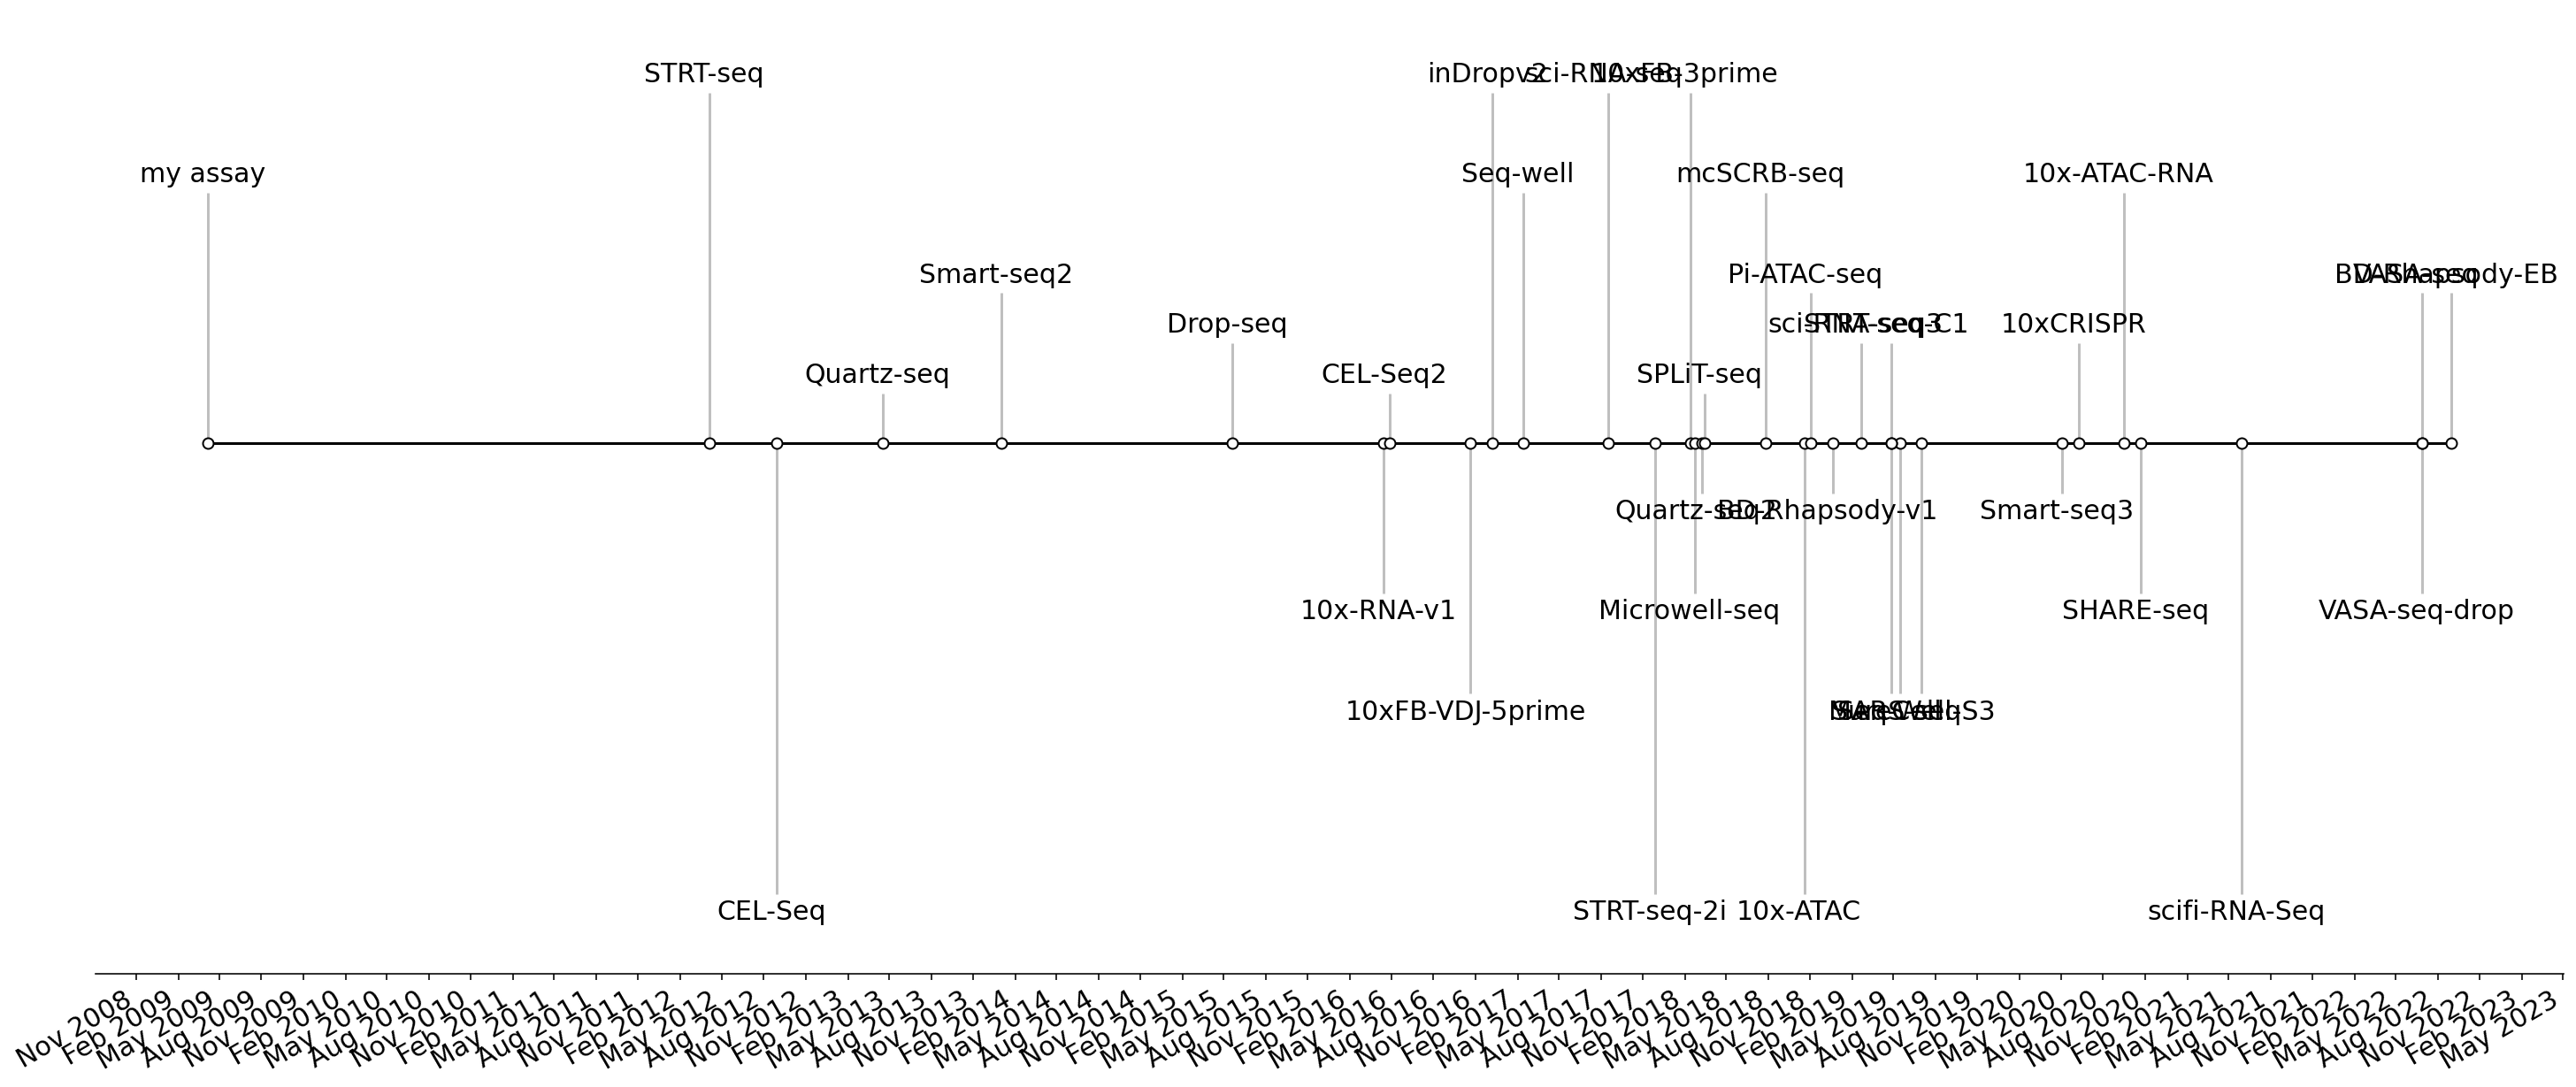

In [13]:
# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(25, 10))

ax.vlines(dates, 0, levels, color="grey", alpha=0.5)  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o", color="k", markerfacecolor="w")  # Baseline and markers on it.
# ax.plot(new_cases.index.values, new_cases.values/new_cases.max()*10, color="lightgrey", label="New cases", zorder = -2)
# annotate lines
for d, l, desc in zip(dates, levels, descriptions):

  weight = "light"
  # if tl["highlight"]:
  #   weight = "bold"
  ax.annotate(desc, xy=(d, l),
              xytext=(-3, np.sign(l)*3), textcoords="offset points",
              horizontalalignment="center",
              verticalalignment="bottom" if l > 0 else "top", weight=weight)

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=3))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

# ax.axvline(x=datetime.strptime("January 01, 2021", fmt), color="lightgrey", linestyle="--", zorder=-1)
ax.margins(y=0.1)
ax.set(**{
    "title": ""
})

fig.show()

# Code testing

In [14]:
from seqspec.utils import load_spec, get_cuts
from seqspec.seqspec_index import run_index
from seqspec.seqspec_find import run_find
import os

In [15]:
specA = load_spec("seqspec/assays/10x-RNA-v3/spec.yaml")
specB = load_spec("seqspec/assays/SPLiT-seq/spec.yaml")

# modality
mA = "RNA"
mB = "RNA"

modeA = specA.get_modality(mA)
modeB = specB.get_modality(mA)

# Get the regions from specA based on the FASTQ file names
fqA_fns = ["data/R1.fastq.gz", "data/R2.fastq.gz"]
fqB_fns = ["data/R1.fastq.gz", "data/R2.fastq.gz"]



In [32]:
print(modeA.sequence)

AATGATACGGCGACCACCGAGATCTACACTCTTTCCCTACACGACGCTCTTCCGATCTNNNNNNNNNNNNNNNNNNNNNNNNNNNNXAGATCGGAAGAGCACACGTCTGAACTCCAGTCACNNNNNNNNATCTCGTATGCCGTCTTCTGCTTG


In [16]:
from collections import defaultdict
def run_index_by_type(spec, modality, region_id, rev=False):
    rid = region_id
    # run function
    index = defaultdict(list)
    regions = run_find(spec, modality, rid)
    leaves = regions[0].get_leaves()
    if rev:
        leaves.reverse()
    cuts = get_cuts(leaves)

    # groupby requested region
    for idx, l in enumerate(leaves):
        t = l.region_type
        c = cuts[idx]
        d = {"region_id":rid, "cuts": c}

        index[t].extend([d])
    return index

In [17]:
len("CAGCAGCCAGTCGTGCGCAGGAAGTTCAGCAGCCAGTCGTGCGCAGGAAGTTCAGCAGCCAGTCGTGCGCAGGAAGTTCAGCAGCCAGTCGTGCGCAGGAAGTTCAGCAGCCAGTCGTGCGCAGGAAGTTCAGCAGCCAGTCGTGCGCAGGAAGTT")

156

In [18]:
!printf """@D00456:228:HL73JBCXY:2:1114:13288:75632 1:N:0:0\nCAGCAGCCAGTCGTGCGCAGGAAGTT\n+\nGGGGGIIIIIIIIIIIIIIIIGIIII\n@D00456:228:HL73JBCXY:2:1216:6647:85709 1:N:0:0\nCAGCTGGAGATACACAGGGGCCCGCA\n+\nGGGGGGIGGIGIIGIGGGIGGIIIGG\n@D00456:228:HL73JBCXY:2:1206:8492:9636 1:N:0:0\nCAGCTGGTCAGGCCCATAGTCTATTT\n+\nGGGGGIIIGGIIGIIIIIIGGGIIII\n""" | gzip > R1.fastq.gz


In [19]:
import gzip
from contextlib import ExitStack


def write_read(header, seq, qual, f):
  f.write(f"{header}\n{seq}\n+\n{qual}\n")

def run_split(spec, modality, rid, fname, o=""):
  # given a modality, region, and FASTQ file, separate all of the first level sub regions 
  index = defaultdict(list)

  rgn = run_find(spec, modality, rid)[0]
  cuts = get_cuts(rgn.regions)
  # groupby requested region
  for idx, l in enumerate(rgn.regions):
      t = l.region_type
      c = cuts[idx]

      index[t].extend([c])
  # sort the lists within each
  for r, cs in index.items():
    index[r] = sorted(cs, key=lambda tup: tup[0])
    print(index)


  with gzip.open(fname, 'rt') as f, ExitStack() as stack:
    outfile = {fname: stack.enter_context(open(f"{o+fname}.fastq", "w")) for fname in index.keys()}
    lines = []
    for idx, l in enumerate(f):
      lines.append(l.strip())
      if (idx + 1)%4 != 0:
        continue
      header = lines[0]
      seq = lines[1]
      qual = lines[3]
      for rgn, cs in index.items():
        for c in cs:
          l,r = c
          print(l,r)
          write_read(header, seq[l:r], qual[l:r], outfile[rgn])
      lines = []

In [20]:
import os

In [21]:
os.path.join("asd", "fastq")

'asd/fastq'

In [22]:
!cat barcode.fastq umi.fastq

cat: barcode.fastq: No such file or directory
cat: umi.fastq: No such file or directory


In [23]:
!cat cDNA.fastq

cat: cDNA.fastq: No such file or directory


In [24]:
# target is each region_type gets a fastq file with the relevant sequence
tmp = {}
r = "R2.fastq.gz"
x = run_index_by_type(specB, "RNA", r)
r = "R1.fastq.gz"
y = run_index_by_type(specB, "RNA", r)

In [25]:
merged = { key: x.get(key,[]) + y.get(key, []) for key in set(list(x.keys()) + list(y.keys())) }

In [26]:
merged["barcode"]

[{'region_id': 'R2.fastq.gz', 'cuts': (0, 8)},
 {'region_id': 'R2.fastq.gz', 'cuts': (38, 46)},
 {'region_id': 'R2.fastq.gz', 'cuts': (76, 84)}]

In [27]:
files = {
    "R1.fastq.gz": "ATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACG",
    "R2.fastq.gz": "ATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACG"
}

In [28]:
write = defaultdict(list)
for k, v in merged.items():
  for c in v:
    rid = c["region_id"]
    l,r = c["cuts"]
    subseq = files[rid][l:r]
    write[k].append(subseq)
    print(k, rid, l,r,subseq)

umi R2.fastq.gz 84 94 AGCATCGACT
barcode R2.fastq.gz 0 8 ATGTCTCT
barcode R2.fastq.gz 38 46 TCTCTGGT
barcode R2.fastq.gz 76 84 CTGGTACT
cDNA R1.fastq.gz 0 98 ATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGC
linker R2.fastq.gz 8 38 GGTACTAGCATCGACTGCGCTAAAACGATG
linker R2.fastq.gz 46 76 ACTAGCATCGACTGCGCTAAAACGATGTCT


In [29]:
write

defaultdict(list,
            {'umi': ['AGCATCGACT'],
             'barcode': ['ATGTCTCT', 'TCTCTGGT', 'CTGGTACT'],
             'cDNA': ['ATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGCTAAAACGATGTCTCTGGTACTAGCATCGACTGCGC'],
             'linker': ['GGTACTAGCATCGACTGCGCTAAAACGATG',
              'ACTAGCATCGACTGCGCTAAAACGATGTCT']})

In [30]:
# from contextlib import ExitStack

# with ExitStack() as stack, open(file_c, "w") as out:
#     infiles = [stack.enter_context(open(fname)) for fname in filenames]
#     for lines in zip(*infiles):
#         out.writelines(lines)